In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import cv2
import os
import matplotlib.pyplot as plt

from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [2]:
#讀取訓練及測試圖檔位址
imagePaths_train = sorted(list(paths.list_images(".\\Dataset\\OK\\train")))
imagePaths_test = sorted(list(paths.list_images(".\\Dataset\\OK\\test")))

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
#0代表O，1代表K
train_feature = []
train_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test_feature = []
test_label = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
#讀取圖片，並轉為陣列，加入訓練特徵集及測試特徵集
for imagePath in imagePaths_train:
    print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    train_feature.append(image)
for imagePath in imagePaths_test:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    test_feature.append(image)

.\Dataset\OK\train\0.png
.\Dataset\OK\train\01.png
.\Dataset\OK\train\02.png
.\Dataset\OK\train\03.png
.\Dataset\OK\train\04.png
.\Dataset\OK\train\05.png
.\Dataset\OK\train\06.png
.\Dataset\OK\train\07.png
.\Dataset\OK\train\08.png
.\Dataset\OK\train\09.png
.\Dataset\OK\train\10.png
.\Dataset\OK\train\11.png
.\Dataset\OK\train\12.png
.\Dataset\OK\train\13.png
.\Dataset\OK\train\14.png
.\Dataset\OK\train\15.png
.\Dataset\OK\train\16.png
.\Dataset\OK\train\17.png
.\Dataset\OK\train\18.png
.\Dataset\OK\train\19.png
.\Dataset\OK\train\20.png
.\Dataset\OK\train\21.png
.\Dataset\OK\train\22.png
.\Dataset\OK\train\23.png
.\Dataset\OK\train\24.png
.\Dataset\OK\train\25.png
.\Dataset\OK\train\26.png
.\Dataset\OK\train\27.png
.\Dataset\OK\train\28.png
.\Dataset\OK\train\29.png
.\Dataset\OK\train\30.png
.\Dataset\OK\train\31.png
.\Dataset\OK\train\32.png
.\Dataset\OK\train\33.png
.\Dataset\OK\train\34.png
.\Dataset\OK\train\35.png
.\Dataset\OK\train\36.png
.\Dataset\OK\train\37.png
.\Dataset\OK\

In [4]:
train_feature = np.array(train_feature, dtype="float")
test_feature = np.array(test_feature, dtype="float")
train_label = np.array(train_label)
test_label = np.array(test_label)

# 訓練資料筆數與維度大小
# 測試資料筆數與維度大小
print("Train Data shape:"  + str(train_feature.shape))
print("Test Data shape:"   + str(test_feature.shape))
print("Train Label shape:" + str(train_label.shape))
print("Test Label shape:"  + str(test_label.shape))

Train Data shape:(40, 32, 32, 1)
Test Data shape:(10, 32, 32, 1)
Train Label shape:(40,)
Test Label shape:(10,)


In [5]:
#以白底黑字顯示2*2吋大小的圖片
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='gray')
    plt.show() 

#顯示圖片、真實值
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='gray')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

訓練圖片


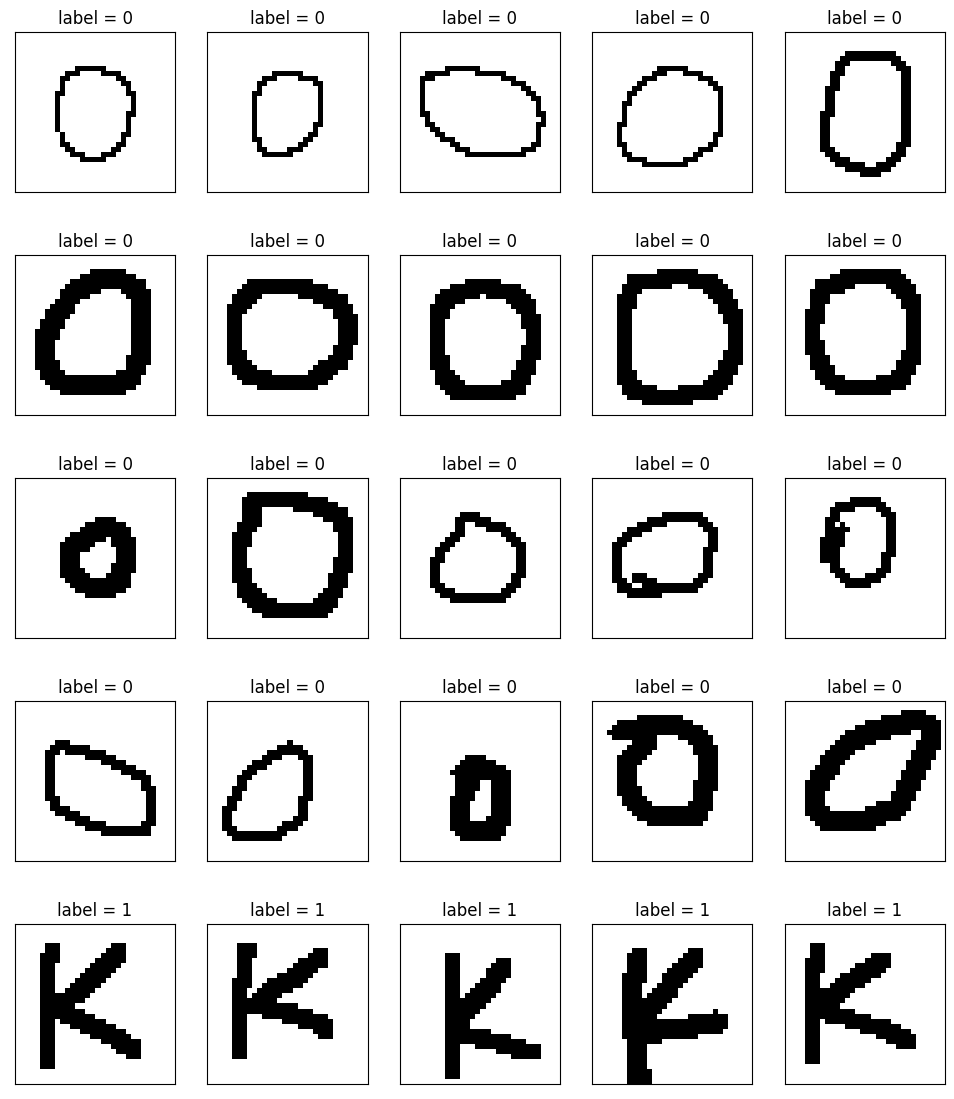

測試圖片


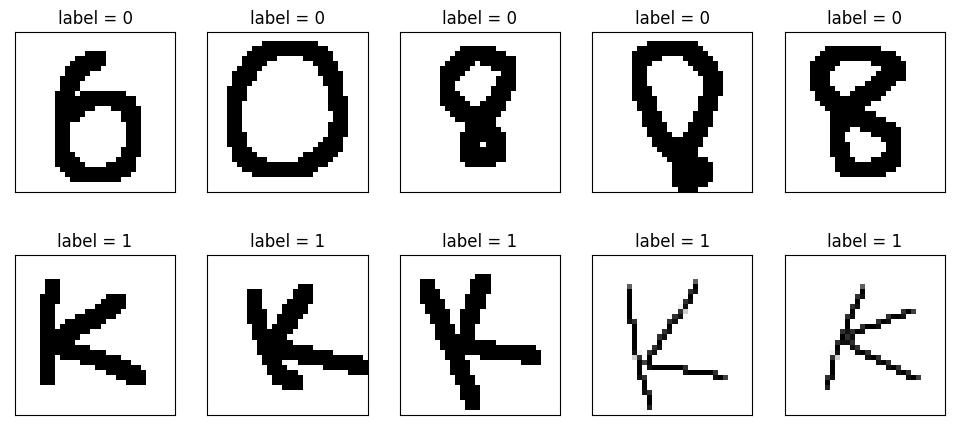

In [6]:
print('訓練圖片')
show_images_labels_predictions(train_feature,train_label,[],0,40)
print('測試圖片')
show_images_labels_predictions(test_feature,test_label,[],0,10)

In [7]:
#將 Features 特徵值轉換為 1024個 float 數字的 1 維向量
train_feature_vector = train_feature.reshape(len(train_feature), 1024).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 1024).astype('float32')
print(train_feature_vector)
print(train_feature_vector.shape)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
(40, 1024)


In [8]:
#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
print(train_feature_normalize)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [9]:
#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = to_categorical(train_label)
test_label_onehot = to_categorical(test_label)
print(test_label_onehot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## 可更改參數：
### 1.增加隱藏層數量
### 2.units：隱藏層node數量(256/512)

In [10]:
#建立模型
model = Sequential()
#輸入層：1024, 隱藏層：256，輸出層：2
model.add(Dense(units=512, 
                input_dim=1024, 
                kernel_initializer='normal', 
                activation='relu'))
#model.add(Dense(units=256,  
#                kernel_initializer='normal', 
#                activation='relu'))
model.add(Dense(units=2, 
                kernel_initializer='normal', 
                activation='softmax'))
model.summary()  # 模型可視化

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 525,826
Trainable params: 525,826
Non-trainable params: 0
_________________________________________________________________


## 可更改參數：
### 1.epochs：迭代次數
### 2.batch_size：每一批次多少資料

In [11]:
#定義訓練方式：選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練20次、每批次讀取4筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=50, batch_size=4,verbose=2)

Epoch 1/50
8/8 - 1s - loss: 2.2039 - accuracy: 0.4688 - val_loss: 0.0647 - val_accuracy: 1.0000 - 1s/epoch - 147ms/step
Epoch 2/50
8/8 - 0s - loss: 0.6055 - accuracy: 0.7188 - val_loss: 0.7812 - val_accuracy: 0.6250 - 117ms/epoch - 15ms/step
Epoch 3/50
8/8 - 0s - loss: 0.4692 - accuracy: 0.8125 - val_loss: 1.5496 - val_accuracy: 0.6250 - 120ms/epoch - 15ms/step
Epoch 4/50
8/8 - 0s - loss: 0.5415 - accuracy: 0.8438 - val_loss: 0.0895 - val_accuracy: 1.0000 - 107ms/epoch - 13ms/step
Epoch 5/50
8/8 - 0s - loss: 0.2127 - accuracy: 0.9062 - val_loss: 1.2730 - val_accuracy: 0.6250 - 108ms/epoch - 14ms/step
Epoch 6/50
8/8 - 0s - loss: 0.2635 - accuracy: 0.9062 - val_loss: 0.0380 - val_accuracy: 1.0000 - 110ms/epoch - 14ms/step
Epoch 7/50
8/8 - 0s - loss: 0.1584 - accuracy: 0.9375 - val_loss: 0.8936 - val_accuracy: 0.6250 - 135ms/epoch - 17ms/step
Epoch 8/50
8/8 - 0s - loss: 0.2357 - accuracy: 0.9062 - val_loss: 0.0950 - val_accuracy: 1.0000 - 133ms/epoch - 17ms/step
Epoch 9/50
8/8 - 0s - loss

In [12]:
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

1/1 [==============================] - 0s 160ms/step - loss: 0.4130 - accuracy: 0.8000

準確率= 0.800000011920929


In [13]:
#將模型儲存至 HDF5檔案中
model.save('OK_mlp_model.h5')